# 20.6: Data Exploration 2

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Preparing-the-data" data-toc-modified-id="Preparing-the-data-0"><span class="toc-item-num">0&nbsp;&nbsp;</span>Preparing the data</a></span><ul class="toc-item"><li><span><a href="#Dealing-with-missing-values" data-toc-modified-id="Dealing-with-missing-values-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>Dealing with missing values</a></span></li><li><span><a href="#Dealing-with-outliers" data-toc-modified-id="Dealing-with-outliers-0.2"><span class="toc-item-num">0.2&nbsp;&nbsp;</span>Dealing with outliers</a></span></li></ul></li><li><span><a href="#Question-1" data-toc-modified-id="Question-1-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Question 1</a></span></li><li><span><a href="#Question-2" data-toc-modified-id="Question-2-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Question 2</a></span></li><li><span><a href="#Question-3" data-toc-modified-id="Question-3-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Question 3</a></span></li><li><span><a href="#Question-4" data-toc-modified-id="Question-4-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Question 4</a></span></li></ul></div>

**Assignment**
In this assignment, you keep working with the Students Performance in Exams dataset from Kaggle. You should access the data from the Thinkful database. Here's the credentials you can use to connect to the database:

`postgres_user = 'dsbc_student'
 postgres_pw = '7*.8G9QH21'
 postgres_host = '142.93.121.174'
 postgres_port = '5432'
 postgres_db = 'studentsperformance'`

To complete this assignment, submit a link to a Jupyter notebook containing your solutions to the following tasks:

## Preparing the data

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.stats.mstats import winsorize
from sqlalchemy import create_engine
import warnings

warnings.filterwarnings('ignore')
sns.set(style="whitegrid")

In [2]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'studentsperformance'

In [3]:
engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

data = pd.read_sql_query('select * from studentsperformance',con=engine)

# no need for an open connection, 
# as we're only doing a single query
engine.dispose()

In [4]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### Dealing with missing values

In [5]:
data.isna().sum()/data.isna().count()

gender                         0.0
race/ethnicity                 0.0
parental level of education    0.0
lunch                          0.0
test preparation course        0.0
math score                     0.0
reading score                  0.0
writing score                  0.0
dtype: float64

There doesn't appear to be any missing values in the dataset.

### Dealing with outliers

In [7]:
exam_scores = ['math score', 'reading score', 'writing score']

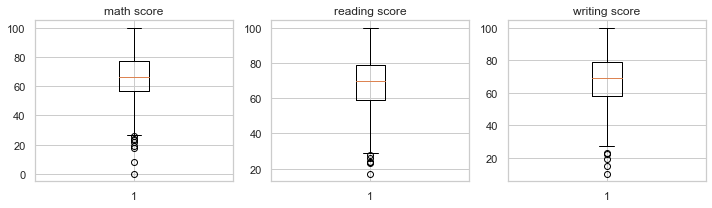

In [8]:
plt.figure(figsize = (10, 3))

for index, col in enumerate(exam_scores):
    plt.subplot(1, 3, index + 1)
    plt.boxplot(data[col])
    plt.title(col)
    
plt.tight_layout()
plt.show()

There are some outliers, so we winsorize at the 99th percentile.

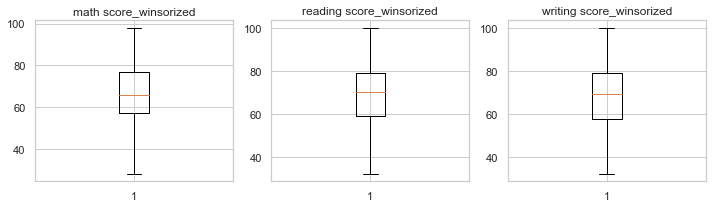

In [9]:
data2 = data.copy()

plt.figure(figsize = (10, 3))

for index, col in enumerate(exam_scores):
    data2[col + '_winsorized'] = winsorize(data2[col], limits = 0.01)
    
    plt.subplot(1, 3, index + 1)
    plt.boxplot(data2[col + '_winsorized'])
    plt.title(col + '_winsorized')
    
plt.tight_layout()
plt.show()

The outliers are now taken care of.

In [19]:
data2.drop(columns = ['math score', 'reading score', 'writing score'], inplace=True)
data2.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score_winsorized',
       'reading score_winsorized', 'writing score_winsorized'],
      dtype='object')

## Question 1
Are there any differences between the genders, ethnicities, and parental level of education with respect to their performances in exams?

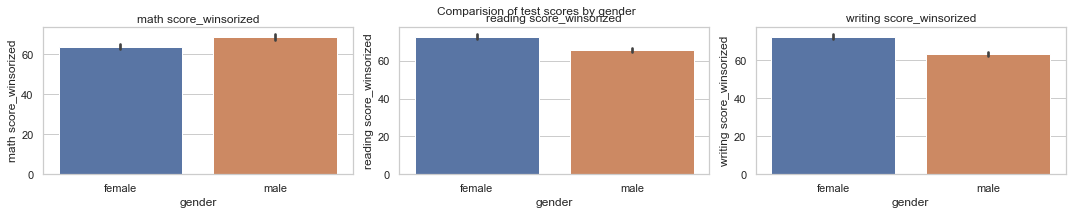

In [42]:
winsorized_exam_scores = [col + '_winsorized' for col in exam_scores]

plt.figure(figsize=(15, 3))

for index, col in enumerate(winsorized_exam_scores):
    plt.subplot(1, 3, index + 1)
    sns.barplot(data = data2, x = 'gender', y = col)
    plt.title(col)
    
plt.suptitle("Comparision of test scores by gender")
plt.tight_layout()
plt.show()
    

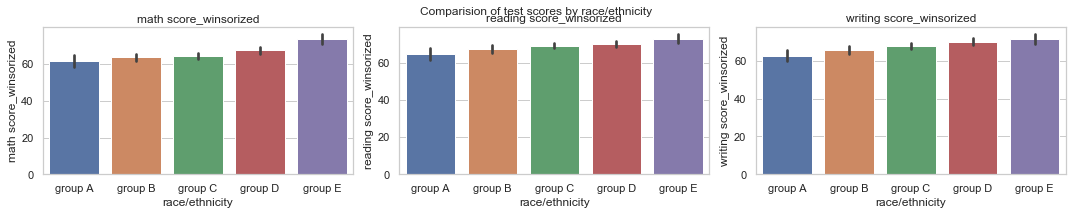

In [41]:
winsorized_exam_scores = [col + '_winsorized' for col in exam_scores]

plt.figure(figsize=(15, 3))

order = ['group A', 'group B', 'group C', 'group D', 'group E']

for index, col in enumerate(winsorized_exam_scores):
    plt.subplot(1, 3, index + 1)
    sns.barplot(data = data2, x = 'race/ethnicity', y = col, order=order)
    plt.title(col)
    
plt.suptitle("Comparision of test scores by race/ethnicity")
plt.tight_layout()
plt.show()
    

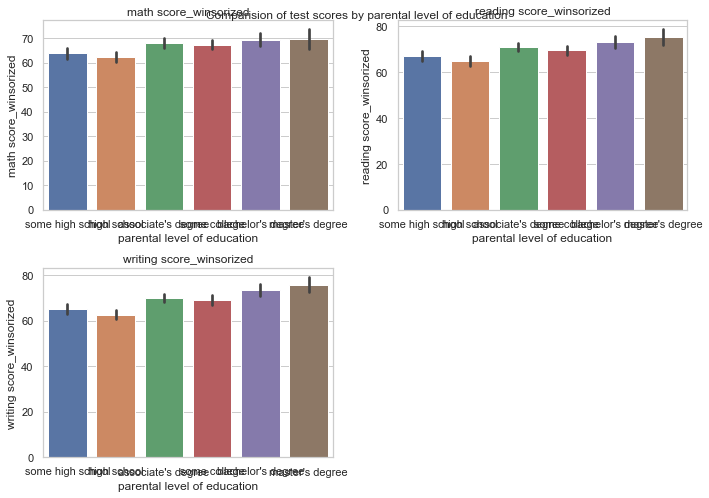

In [48]:
winsorized_exam_scores = [col + '_winsorized' for col in exam_scores]

plt.figure(figsize=(10, 10))

order = ['some high school', 'high school', "associate's degree",
         "some college", "bachelor's degree", "master's degree"]

plt.suptitle("Comparision of test scores by parental level of education")

for index, col in enumerate(winsorized_exam_scores):
    plt.subplot(3, 2, index + 1)
    sns.barplot(data = data2, x = 'parental level of education', y = col, order=order)
    plt.title(col)
    
plt.tight_layout()
plt.show()
    

We notice that there are some visual differences between the groups, and we call these out with two-sided t-tests:

In [96]:
from scipy import stats


for col in winsorized_exam_scores:
    for category in ['gender', 'parental level of education', 'race/ethnicity']:
        category_vals = list(data2[category].unique())
        category_vals.sort()
        
        print('\n ** The following series are statistictally different for {}, along {}:'.format(col, category))
        
        for i in range(len(category_vals)):
            for j in range(i + 1, len(category_vals)):
                if i != j:
                    
                    compare1 = data2[col].loc[data2[category] == category_vals[i]]
                    compare2 = data2[col].loc[data2[category] == category_vals[j]]
                    
                    t = stats.ttest_ind(compare1, compare2)
                    
                    if (t.pvalue > 0.05):
                        print(category_vals[i], 'vs.', category_vals[j], ':', t)


 ** The following series are statistictally different for math score_winsorized, along gender:

 ** The following series are statistictally different for math score_winsorized, along parental level of education:
associate's degree vs. bachelor's degree : Ttest_indResult(statistic=-0.8632079513837555, pvalue=0.38863523336855255)
associate's degree vs. master's degree : Ttest_indResult(statistic=-0.8479366492728468, pvalue=0.3972000985138635)
associate's degree vs. some college : Ttest_indResult(statistic=0.5165258892158724, pvalue=0.6057431720105376)
bachelor's degree vs. master's degree : Ttest_indResult(statistic=-0.1670085111073306, pvalue=0.8675561723913727)
bachelor's degree vs. some college : Ttest_indResult(statistic=1.3421265353855414, pvalue=0.18044526767249175)
high school vs. some high school : Ttest_indResult(statistic=-0.9714282552692204, pvalue=0.3319645753200371)
master's degree vs. some college : Ttest_indResult(statistic=1.2371345024112954, pvalue=0.21706271209886854)


## Question 2
Are there any differences between the lunch types with respect to their performances in exams? If there are, how do you explain this?

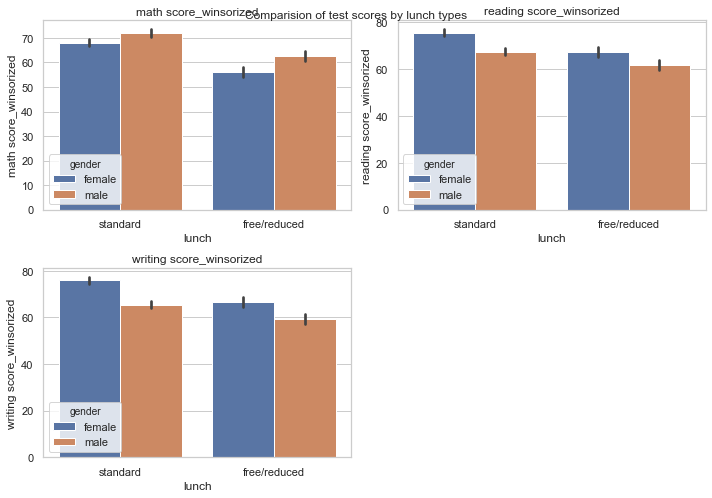

In [98]:
winsorized_exam_scores = [col + '_winsorized' for col in exam_scores]

plt.figure(figsize=(10, 10))


plt.suptitle("Comparision of test scores by lunch types")

for index, col in enumerate(winsorized_exam_scores):
    plt.subplot(3, 2, index + 1)
    sns.barplot(data = data2, x = 'lunch', y = col, hue = 'gender')
    plt.title(col)
    
plt.tight_layout()
plt.show()

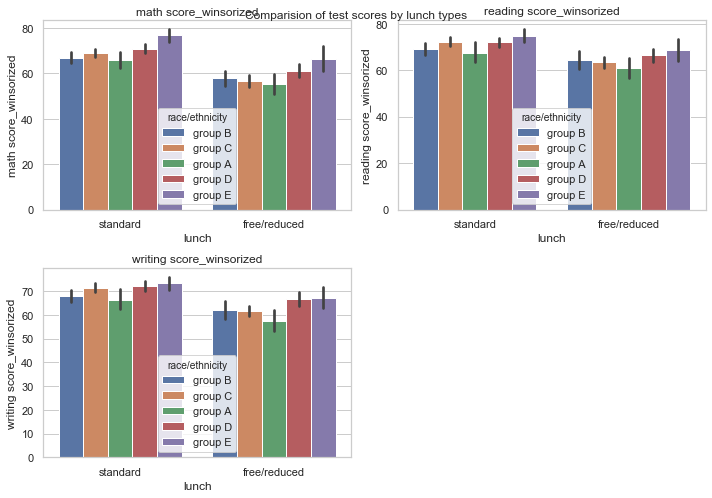

In [99]:
winsorized_exam_scores = [col + '_winsorized' for col in exam_scores]

plt.figure(figsize=(10, 10))


plt.suptitle("Comparision of test scores by lunch types")

for index, col in enumerate(winsorized_exam_scores):
    plt.subplot(3, 2, index + 1)
    sns.barplot(data = data2, x = 'lunch', y = col, hue = 'race/ethnicity')
    plt.title(col)
    
plt.tight_layout()
plt.show()

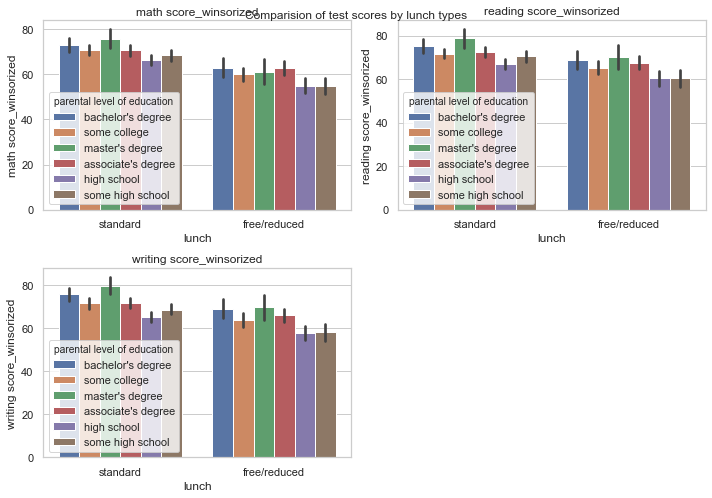

In [100]:
winsorized_exam_scores = [col + '_winsorized' for col in exam_scores]

plt.figure(figsize=(10, 10))


plt.suptitle("Comparision of test scores by lunch types")

for index, col in enumerate(winsorized_exam_scores):
    plt.subplot(3, 2, index + 1)
    sns.barplot(data = data2, x = 'lunch', y = col, hue = 'parental level of education')
    plt.title(col)
    
plt.tight_layout()
plt.show()

## Question 3
Does the test preparation course seem to have an effect on the exam performances?

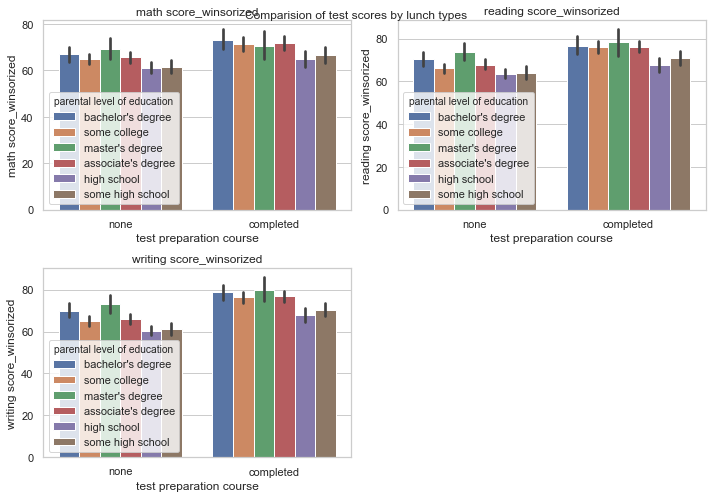

In [110]:
winsorized_exam_scores = [col + '_winsorized' for col in exam_scores]

plt.figure(figsize=(10, 10))


plt.suptitle("Comparision of test scores by lunch types")

for index, col in enumerate(winsorized_exam_scores):
    plt.subplot(3, 2, index + 1)
    sns.barplot(data = data2, x = 'test preparation course', y = col, hue = 'parental level of education')
    plt.title(col)
    
plt.tight_layout()
plt.show()

Yes, it appears that completing a test prep course helps in every category, regardless of the student's parent's level of education.

## Question 4
Which 2 exam scores are most correlated with each other?

In [107]:
data3 = data2.copy()

for cat in ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']:
        data3 = pd.concat([data3, pd.get_dummies(data3[cat], drop_first = True)], axis = 1)
        
corr = data3.corr()
corr

,math score_winsorized,reading score_winsorized,writing score_winsorized,male,group B,group C,group D,group E,bachelor's degree,high school,master's degree,some college,some high school,standard,none
math score_winsorized,1.000000,0.815094,0.798394,0.165860,-0.079986,-0.073012,0.048480,0.205670,0.078551,-0.129413,0.060490,0.036592,-0.076103,0.350950,-0.177167
reading score_winsorized,0.815094,1.000000,0.953536,-0.246704,-0.059567,-0.002590,0.033344,0.107517,0.095659,-0.150951,0.106671,0.010888,-0.070090,0.228233,-0.241562
writing score_winsorized,0.798394,0.953536,1.000000,-0.305734,-0.075777,-0.010431,0.079794,0.090078,0.128286,-0.182871,0.126347,0.028032,-0.094740,0.243438,-0.313816
male,0.165860,-0.246704,-0.305734,1.000000,-0.028466,-0.063368,0.030566,0.020302,-0.011638,0.037952,-0.046188,-0.004460,0.008990,0.021372,-0.006028
group B,-0.079986,-0.059567,-0.075777,-0.028466,1.000000,-0.331479,-0.288574,-0.195411,-0.019121,0.069093,-0.056363,-0.036203,0.026531,-0.008257,0.000106
group C,-0.073012,-0.002590,-0.010431,-0.063368,-0.331479,1.000000,-0.407797,-0.276145,0.015682,0.007977,0.001630,-0.015872,-0.045339,-0.003385,-0.012522
group D,0.048480,0.033344,0.079794,0.030566,-0.288574,-0.407797,1.000000,-0.240402,-0.020556,-0.042118,0.072793,0.042347,0.018402,-0.009458,0.055956
group E,0.205670,0.107517,0.090078,0.020302,-0.195411,-0.276145,-0.240402,1.000000,0.013221,-0.039494,-0.003180,0.023153,-0.053075,0.052398,-0.059393
bachelor's degree,0.078551,0.095659,0.128286,-0.011638,-0.019121,0.015682,-0.020556,0.013221,1.000000,-0.180595,-0.091588,-0.197647,-0.170790,-0.013668,-0.024285
high school,-0.129413,-0.150951,-0.182871,0.037952,0.069093,0.007977,-0.042118,-0.039494,-0.180595,1.000000,-0.123632,-0.266799,-0.230545,-0.002211,0.074446


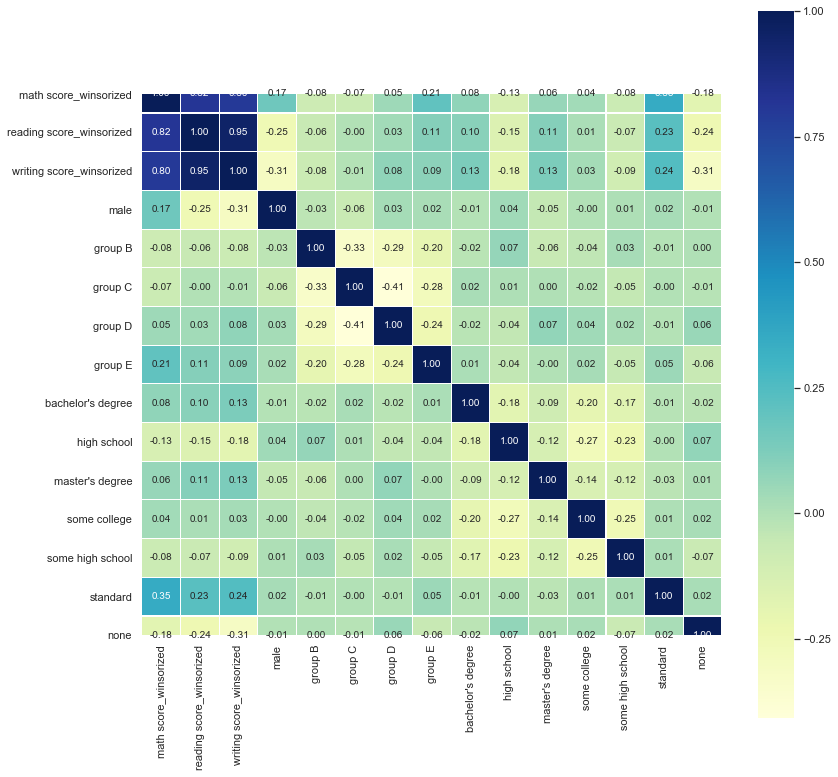

In [108]:
plt.figure(figsize=(13, 13))
sns.heatmap(corr, square=True, annot=True, linewidths=.1, cmap="YlGnBu", fmt = '.2f')